# 课程： Python分析工业大数据

## 第八章 机器学习入门-分类问题   
* Logistic Regression 逻辑回归分类
* SVM Classification  支持向量机分类
* DecisionTree Classification 决策树分类 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

%matplotlib inline


### Logistic Regression 逻辑回归  


In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [4]:
X = iris['data'][:, 3: ] # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [5]:
#用Logistic Regression训练
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
# 查看训练效果
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)


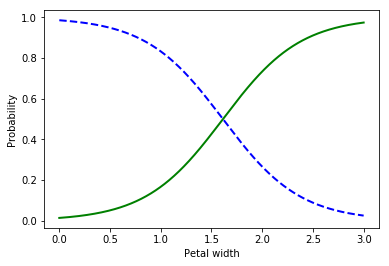

In [7]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica");
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica");
plt.xlabel('Petal width');
plt.ylabel('Probability');

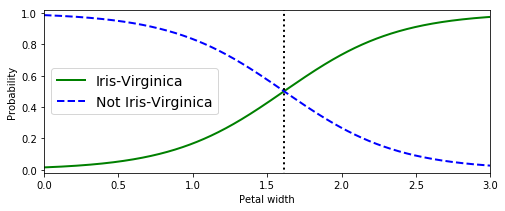

In [8]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica");
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica");
plt.xlabel('Petal width');
plt.ylabel('Probability');
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2);
plt.legend(loc="center left", fontsize=14);
plt.axis([0, 3, -0.02, 1.02]);

In [9]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 两个X， pedal length, pedal width的logistic regression

In [10]:
# 取数据
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

[2.9, 7, 0.8, 2.7]

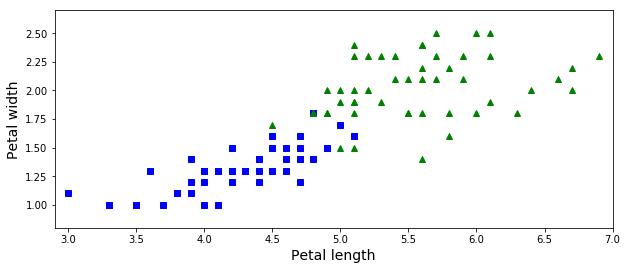

In [11]:
plt.figure(figsize = (10, 4));
plt.plot(X[y==0, 0], X[y==0, 1], 'bs');
plt.plot(X[y==1, 0], X[y==1, 1], 'g^');
plt.xlabel("Petal length", fontsize=14);
plt.ylabel("Petal width", fontsize=14);
plt.axis([2.9, 7, 0.8, 2.7])

In [12]:
log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [13]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

In [14]:
y_proba = log_reg.predict_proba(X_new)

[2.9, 7, 0.8, 2.7]

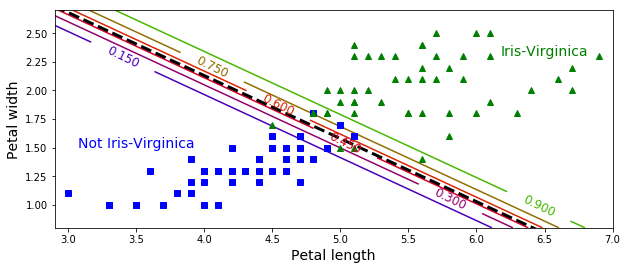

In [15]:
plt.figure(figsize = (10, 4));
plt.plot(X[y==0, 0], X[y==0, 1], 'bs');
plt.plot(X[y==1, 0], X[y==1, 1], 'g^');
plt.xlabel("Petal length", fontsize=14);
plt.ylabel("Petal width", fontsize=14);

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg);

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12);
plt.plot(left_right, boundary, "k--", linewidth=3);

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.axis([2.9, 7, 0.8, 2.7])

###  SVM Classifier  支持向量机分类
A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. 

## SVM key points:  
1) SVMs are sensitive to the feature scales, so standardization is  a critial step in data processing;  
2) hard margin classification vs. soft margin classification; we use hyperparameter C to control over this situation: smaller in C value leads to more margin in model;

### 线性SVM

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

In [17]:
iris = datasets.load_iris()

In [18]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [19]:
scaler = StandardScaler()
svm_clf = LinearSVC(C=100, loss="hinge", random_state=42)

In [20]:
scaled_svm_clf = Pipeline([ ("scaler", scaler),
                           ("linear_svc", svm_clf),])

scaled_svm_clf.fit(X, y)

/Users/RichardZhou/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [21]:
# Convert to unscaled parameters
b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])

In [22]:
# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx]

In [23]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

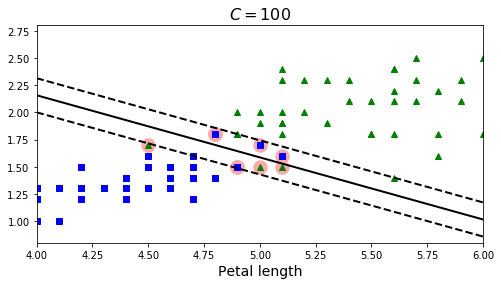

In [24]:
plt.figure(figsize=(8,4))

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^");
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs");
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14);
plt.title("$C = {}$".format(svm_clf.C), fontsize=16);
plt.axis([4, 6, 0.8, 2.8]);

In [25]:
#预测
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [26]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
xmin, xmax = 0, 7
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

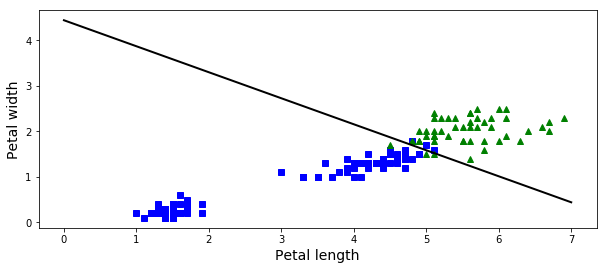

In [27]:
# 图形
plt.figure(figsize = (10, 4));
plt.plot(X[y==0, 0], X[y==0, 1], 'bs');
plt.plot(X[y==1, 0], X[y==1, 1], 'g^');
plt.plot(x0, decision_boundary, "k-", linewidth=2);
plt.xlabel("Petal length", fontsize=14);
plt.ylabel("Petal width", fontsize=14);

### 非线性SVM  
kernal = polynormial

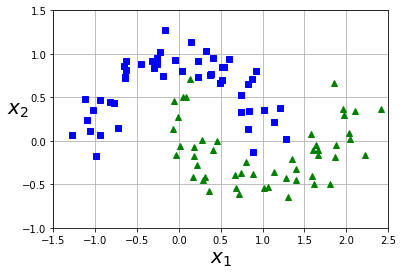

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

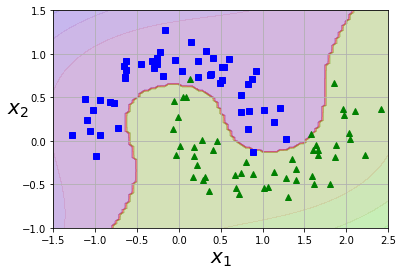

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 非线性 SVM  
kernal = rbf

In [31]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [32]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

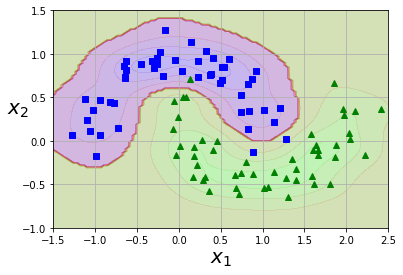

In [33]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()